# Data Story Telling: Starbucks Data

In this assignment EDA is performed on Starbucks data that is available on Kaggle.

In [1]:
# Loading python packages

import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
%matplotlib inline

In [8]:
# Loading Starbucks data

df_drinks=pd.read_csv('./data/starbucks-menu-nutrition-drinks.csv',index_col=0)

In [9]:
df_drinks.head()

,Calories,Fat (g),Carb. (g),Fiber (g),Protein,Sodium
Cool Lime Starbucks Refreshers™ Beverage,45,0,11,0,0,10
Ombré Pink Drink,-,-,-,-,-,-
Pink Drink,-,-,-,-,-,-
Strawberry Acai Starbucks Refreshers™ Beverage,80,0,18,1,0,10
Very Berry Hibiscus Starbucks Refreshers™ Beverage,60,0,14,1,0,10


In [10]:
df_drinks.info()

<class 'pandas.core.frame.DataFrame'>
Index: 177 entries, Cool Lime Starbucks Refreshers™ Beverage to Orange Cream Soda
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Calories   177 non-null    object
 1   Fat (g)    177 non-null    object
 2   Carb. (g)  177 non-null    object
 3   Fiber (g)  177 non-null    object
 4   Protein    177 non-null    object
 5   Sodium     177 non-null    object
dtypes: object(6)
memory usage: 9.7+ KB


In [15]:
# find encoding

import chardet    
rawdata = open('./data/starbucks-menu-nutrition-food.csv', 'rb').read()
result = chardet.detect(rawdata)
charenc = result['encoding']
print(charenc)

UTF-16


In [17]:
df_food=pd.read_csv('./data/starbucks-menu-nutrition-food.csv',index_col=0,encoding = 'UTF-16')

In [18]:
df_food.head()

,Calories,Fat (g),Carb. (g),Fiber (g),Protein (g)
Chonga Bagel,300,5.0,50,3,12
8-Grain Roll,380,6.0,70,7,10
Almond Croissant,410,22.0,45,3,10
Apple Fritter,460,23.0,56,2,7
Banana Nut Bread,420,22.0,52,2,6


In [19]:
df_food.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113 entries, Chonga Bagel to Seasonal Fruit Blend
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0    Calories     113 non-null    int64  
 1    Fat (g)      113 non-null    float64
 2    Carb. (g)    113 non-null    int64  
 3    Fiber (g)    113 non-null    int64  
 4    Protein (g)  113 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 5.3+ KB


In [12]:
df_drinks_expanded=pd.read_csv('./data/starbucks_drinkMenu_expanded.csv',index_col=0)

In [13]:
df_drinks_expanded.head()

,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
Beverage_category,,,,,,,,,,,,,,,,,
Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


In [14]:
df_drinks_expanded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 242 entries, Coffee to Frappuccino® Blended Crème
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Beverage                   242 non-null    object 
 1   Beverage_prep              242 non-null    object 
 2   Calories                   242 non-null    int64  
 3    Total Fat (g)             242 non-null    object 
 4   Trans Fat (g)              242 non-null    float64
 5   Saturated Fat (g)          242 non-null    float64
 6    Sodium (mg)               242 non-null    int64  
 7    Total Carbohydrates (g)   242 non-null    int64  
 8   Cholesterol (mg)           242 non-null    int64  
 9    Dietary Fibre (g)         242 non-null    int64  
 10   Sugars (g)                242 non-null    int64  
 11   Protein (g)               242 non-null    float64
 12  Vitamin A (% DV)           242 non-null    object 
 13  Vitamin C (% DV)           

## Drinks and Food based on two criteria: total calorie and total carbs will be explored.

In the total calorie case diet will be limited to 400 calories (20% of total 2000 calories). In the total carbs case, which is more oriented towards carb control total carbs are limited to 23g.

### The question: Are there calorie and carb limiting drinks and food available at Starbucks for folks who are controlling their diet ?

Text(0.5, 0.98, 'Drinks nutrition distribution')

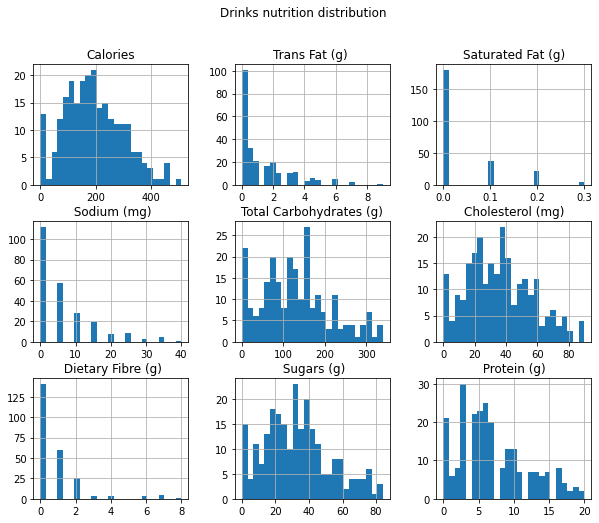

In [107]:
# Plotting the distribution of drink calories
import pylab as pl

hist_drinks=df_drinks_expanded.hist(bins=25,figsize=[10,8],)
pl.suptitle('Drinks nutrition distribution')

Text(0.5, 0.98, 'Food nutrition distribution')

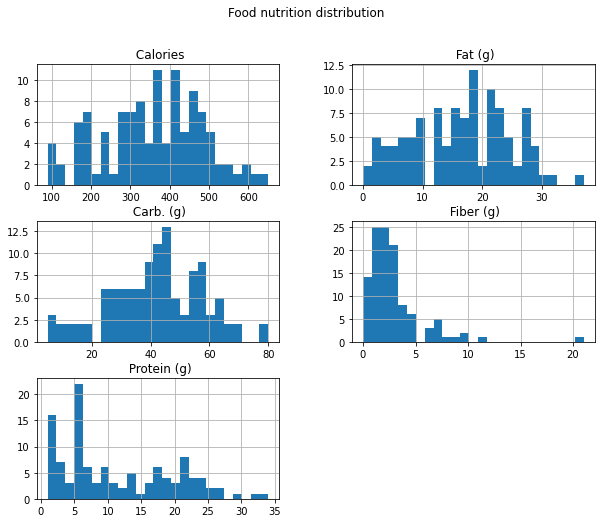

In [108]:
# Plotting the distribution of food calories

hist_food=df_food.hist(bins=25,figsize=[10,8])
pl.suptitle('Food nutrition distribution')

The histogram plots above show that there are drinks or food items below either 400 calories or 23 g of carbs at Starbucks.

Text(0.5, 1.0, 'Calories vs. Carbs for healthy drinks \n colors: Calories , size= Carbs')

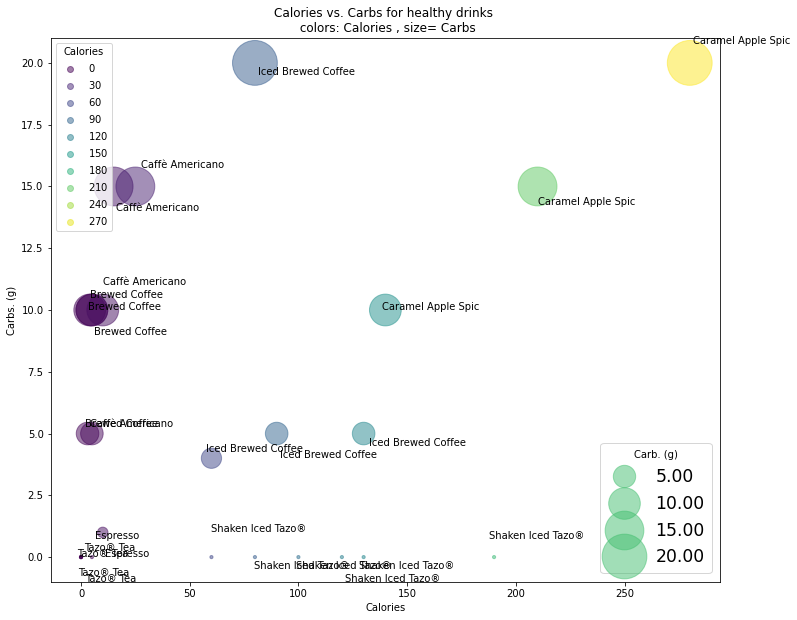

In [201]:
# 'Healthy' drink choices

df_drinks_limited=df_drinks_expanded[(df_drinks_expanded['Calories']<400)& (df_drinks_expanded[' Total Carbohydrates (g) ']<23)]

drink_cal=np.array(df_drinks_limited['Calories'])
drink_carb=np.array(df_drinks_limited[' Total Carbohydrates (g) '])

size=100*((df_drinks_limited[' Total Carbohydrates (g) ']+0.1))

#size=100*np.array(pd.to_numeric(df_drinks_limited[' Total Fat (g)']))



Beverages=(df_drinks_limited['Beverage'])

import random


fig, ax = plt.subplots(figsize=(12,10))

scatter = ax.scatter(drink_cal, drink_carb, c=drink_cal, s=size,alpha=0.5, edgecolors=None)

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper left", title="Calories")
ax.add_artist(legend1)

kw = dict(prop="sizes", num=5, color=scatter.cmap(0.7), fmt="{x:.2f}",
          func=lambda size: size/100)
legend2 = ax.legend(*scatter.legend_elements(**kw),
                    loc="lower right", title="Carb. (g)",fontsize='xx-large')

for i, txt in enumerate(Beverages):
    ax.annotate(txt[0:18], (drink_cal[i]+0.5*(random.randint(-5, 5)), drink_carb[i]+0.25*(random.randint(-4, 4))))

plt.xlabel('Calories')
plt.ylabel('Carbs. (g)')
plt.title('Calories vs. Carbs for healthy drinks \n colors: Calories , size= Carbs' )

### Observation: All carbs. controlling drinks (carbs. < 23 g) meet the calorie < 400 criteria.

In [160]:
df_food.columns

Index([' Calories', ' Fat (g)', ' Carb. (g)', ' Fiber (g)', ' Protein (g)'], dtype='object')

Text(0.5, 1.0, 'Calories vs. Carbs for healthy snacks \n colors: Calories , size= Carbs')

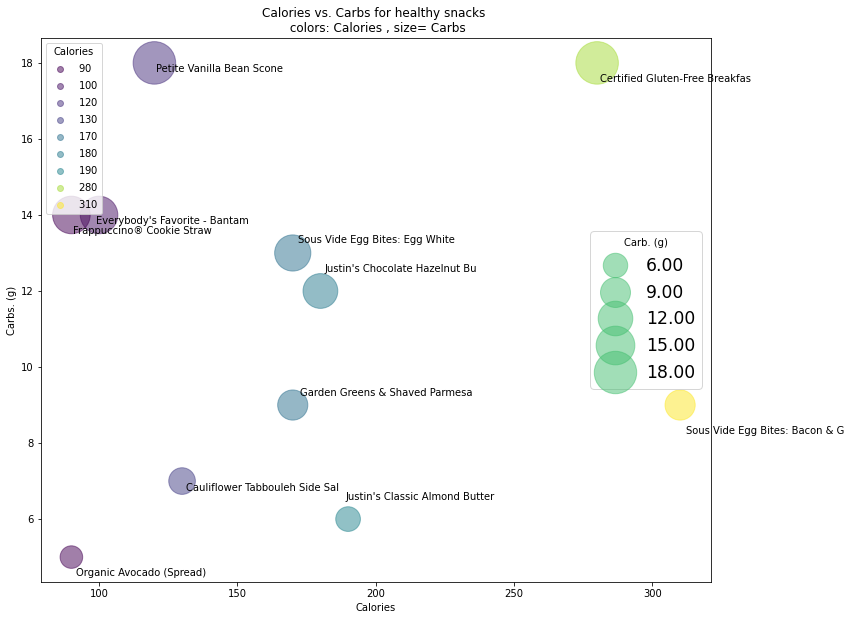

In [175]:
# 'Healthy' food choices

df_food_limited=df_food[(df_food[' Calories']<400) & (df_food[' Carb. (g)']<23)]

food_cal=np.array(df_food_limited[' Calories'])
food_carb=np.array(df_food_limited[' Carb. (g)'])

size=100*((df_food_limited[' Carb. (g)']+0.1))

Snacks=(df_food_limited.index)


fig, ax2 = plt.subplots(figsize=(12,10))

scatter = ax2.scatter(food_cal, food_carb, c=food_cal, s=size,alpha=0.5, edgecolors=None)

# produce a legend with the unique colors from the scatter
legend1 = ax2.legend(*scatter.legend_elements(),
                    loc="upper left", title="Calories")
ax2.add_artist(legend1)

kw = dict(prop="sizes", num=5, color=scatter.cmap(0.7), fmt="{x:.2f}",
          func=lambda size: size/100)
legend2 = ax2.legend(*scatter.legend_elements(**kw),
                    loc="right", title="Carb. (g)",fontsize='xx-large')

for i, txt in enumerate(Snacks):
    ax2.annotate(txt[0:30], (food_cal[i]+0.5*(random.randint(-5, 5)), food_carb[i]+0.25*(random.randint(-4, 4))))

plt.xlabel('Calories')
plt.ylabel('Carbs. (g)')
plt.title('Calories vs. Carbs for healthy snacks \n colors: Calories , size= Carbs' )

### Observation: 'Healthy' snack item choices are available at Starbucks.


In [202]:
df_drinks_limited.reset_index(inplace=True)

In [203]:
df_drinks_limited.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Americano,Short,5,0,0.0,0.0,0,5,1,0,0,0.4,0%,0%,0%,0%,75


Text(0.5, 1.0, 'Drink-Snack Comination \n Total Calories')

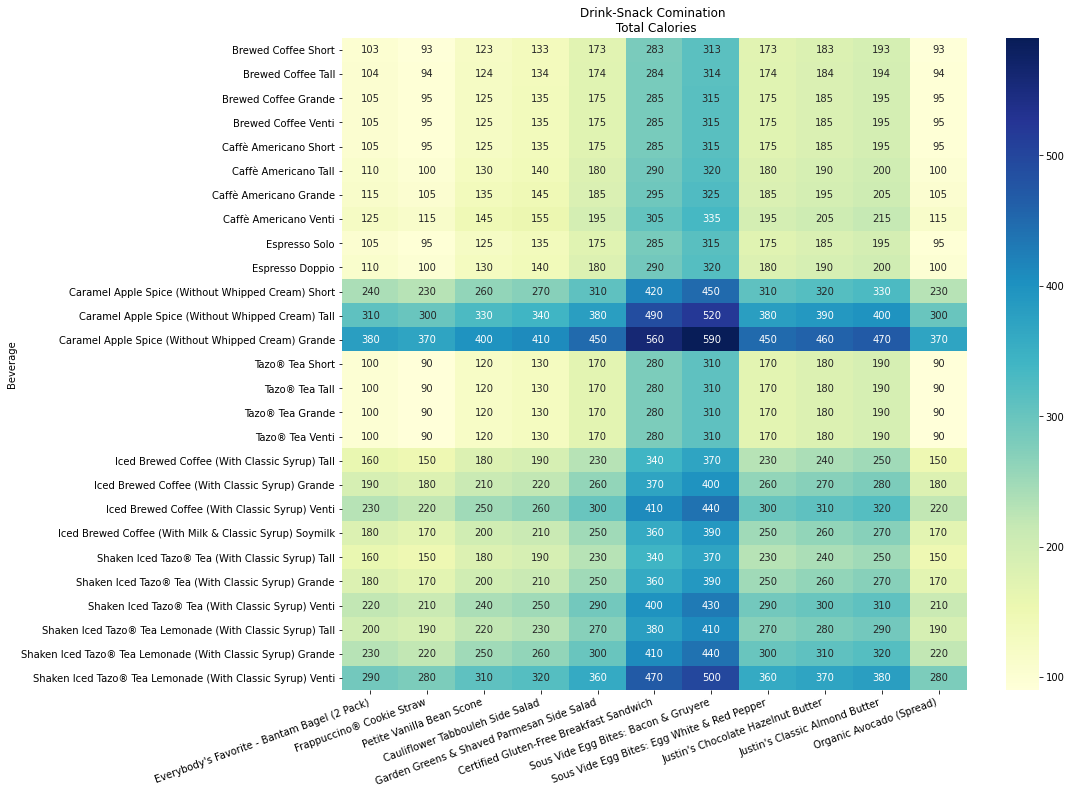

In [242]:
#Combining drinks with snacks

Index= df_drinks_limited['Beverage'].str.cat(df_drinks_limited['Beverage_prep'],sep=" ")

Cols = df_food_limited.index

total_cal=np.zeros((len(Index),len(Cols)), dtype=int)

for i, ind in enumerate(Index):
    for j, col  in enumerate(Cols):
        total_cal[i,j]=(df_drinks_limited['Calories'].iloc[i]+df_food_limited[' Calories'].iloc[j])

df_snack_priority = DataFrame(total_cal, index=Index, columns=Cols)

#df_snack_priority_control=df_snack_priority[(df_snack_priority['total_cal']<400)]

fig3, ax3 = plt.subplots(figsize=(14,12))

ax3=sns.heatmap(df_snack_priority, annot=True,fmt="d", cmap="YlGnBu")

plt.xticks(rotation=20, ha="right") 
#plt.xticks(rotation=-20, ha="left") 
plt.title('Drink-Snack Comination \n Total Calories') 

### Conclusion: Several 'Healthy' drink and snack combination choices are available at Starbucks. A few exceptions; don't combine Caramel Apple Spice or Shaken Iced Tea (Grande or Venti size) with the Breakfast or Egg whites with bacon, and you should be fine !